<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization - Histograms**


### Student Author: Abigail Hedden

## Set-up

In [148]:
# install necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.patches import Patch
import seaborn as sns
import sqlite3
import textwrap

In [ ]:
# pre-set plotting style
sns.set(style="whitegrid")

### Load Dataset

In [95]:
# download database file
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-11 08:58:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  17.8MB/s    in 9.2s    

2025-07-11 08:58:28 (21.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [260]:
# connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

In [99]:
# verify table names
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn2)

,Table_Name
0,main


## Query data from SQLite for Histograms

### Histogram of CompTotal (Total Compensation) Distribution

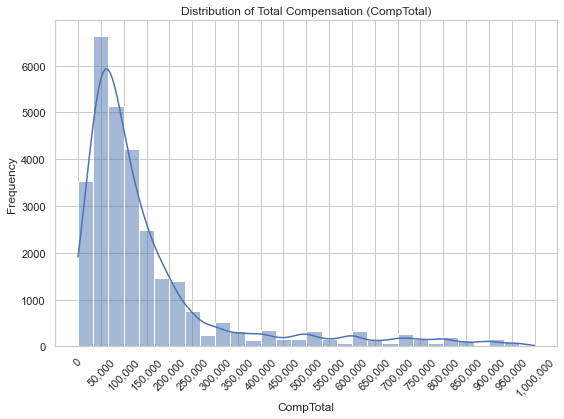

In [106]:
# query data -- exclude outlier compensation data based on stats calculated above
comp_df = pd.read_sql_query("SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 1000000", conn2)

# plot
plt.figure(figsize=(9, 6))
sns.histplot(comp_df['CompTotal'], bins=30, kde=True)

# customize x-ticks
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
plt.xticks(rotation=45)

plt.title("Distribution of Total Compensation (CompTotal)")
plt.xlabel("CompTotal")
plt.ylabel("Frequency")
plt.show()

### Histogram of YearsCodePro (Years of Professional Coding Experience)

In [114]:
# query needed data
years_code_pro_df = pd.read_sql_query("SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL", conn2)
print(years_code_pro_df['YearsCodePro'].unique())

# update non-numerical data for less than 1 year and more than 50 years
years_code_pro_df['YearsCodePro'] = years_code_pro_df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}).astype(float)

# verify
print('')
print(years_code_pro_df['YearsCodePro'].unique())

['17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37' '15'
 '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33'
 '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44'
 '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']

[17.  27.   7.  11.  25.  12.  10.   3.   0.5 18.  37.  15.  20.   6.
  2.  16.   8.  14.   4.  45.   1.  24.  29.   5.  30.  26.   9.  33.
 13.  35.  23.  22.  31.  19.  21.  28.  34.  32.  40.  50.  39.  44.
 42.  41.  36.  38.  51.  43.  47.  48.  46.  49. ]


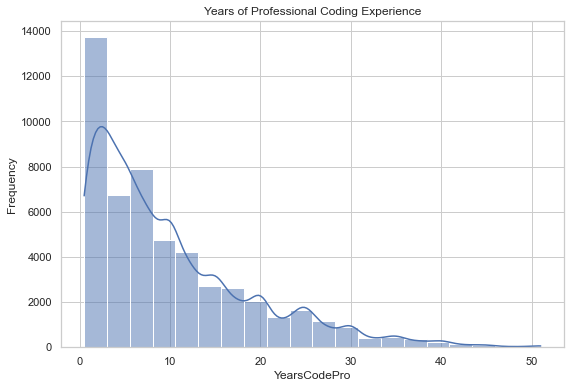

In [116]:
# plot
plt.figure(figsize=(9, 6))
sns.histplot(years_code_pro_df['YearsCodePro'], bins=20, kde=True)
plt.title("Years of Professional Coding Experience")
plt.xlabel("YearsCodePro")
plt.ylabel("Frequency")
plt.show()

### Histogram Comparison of CompTotal by Age Group

In [119]:
# query needed data
age_comp_df = pd.read_sql_query("SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL AND CompTotal <1000000", conn2)
age_comp_df

,Age,CompTotal
0,25-34 years old,28000.0
1,35-44 years old,85000.0
2,35-44 years old,50000.0
3,25-34 years old,110000.0
4,35-44 years old,126420.0
...,...,...
29742,18-24 years old,36000.0
29743,25-34 years old,40000.0
29744,25-34 years old,61000.0
29745,35-44 years old,58000.0


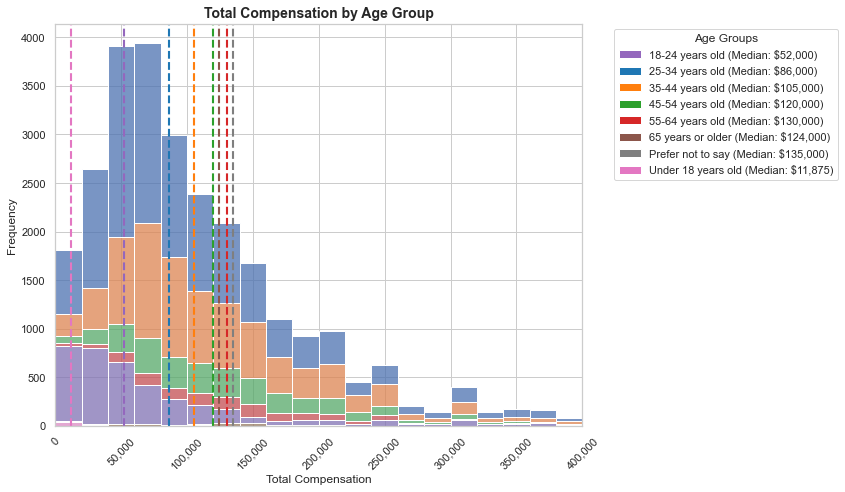

In [197]:
# (additional to assignment)
# calulcate median per age group
comp_medians = age_comp_df.groupby('Age')['CompTotal'].median().sort_index()

# make a dictionary for Age group to color
hue_order = age_comp_df['Age'].unique()
colors = sns.color_palette("tab10", len(hue_order))
color_dict = dict(zip(hue_order, colors))


# plot
plt.figure(figsize=(12, 7))
ax = sns.histplot(data=age_comp_df, x='CompTotal', hue='Age', multiple='stack', bins=50)

# customize x-ticks
ax.xaxis.set_major_locator(mtick.MultipleLocator(50000))
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.xticks(rotation=45)

# add vertical lines for medians with matching colors
for age_group, median_val in comp_medians.items():
    ax.axvline(median_val, color=color_dict[age_group], linestyle='--', linewidth=2.1)

# create custom legend
legend_elements = []
for age_group in sorted(comp_medians.index):
    median_val = comp_medians[age_group]
    color = color_dict[age_group]
    legend_elements.append(Patch(facecolor=color, 
                                label=f"{age_group} (Median: ${int(median_val):,})"))
plt.legend(handles=legend_elements, title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Total Compensation by Age Group", fontsize=14, fontweight='bold')
plt.xlabel("Total Compensation", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 400000)

plt.tight_layout()

plt.show()

### Histogram of TimeSearching for Different Age Groups

In [156]:
time_search_df = pd.read_sql_query("SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL", conn2)
time_search_df['TimeSearching'].unique()

array(['30-60 minutes a day', '60-120 minutes a day',
       '15-30 minutes a day', 'Less than 15 minutes a day',
       'Over 120 minutes a day'], dtype=object)

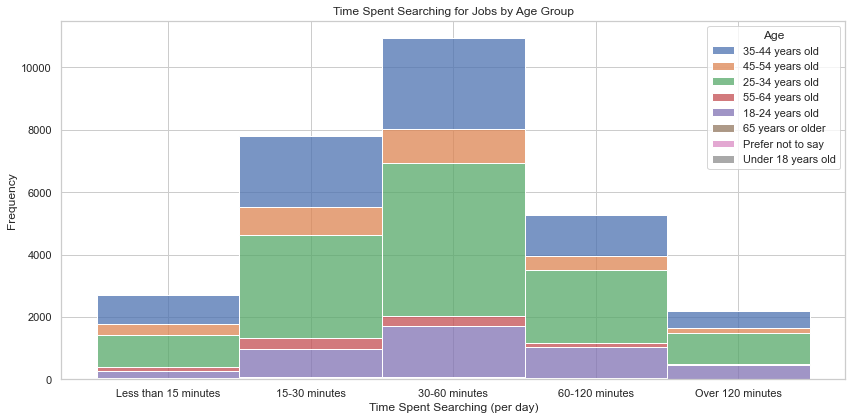

In [165]:
# define order for time searching for better readbility 
desired_order = [
    'Less than 15 minutes',
    '15-30 minutes',
    '30-60 minutes',
    '60-120 minutes',
    'Over 120 minutes'
]

# remove ' a day' from 'TimeSearching' values in the dataframe for plotting
time_search_df['TimeSearching_clean'] = time_search_df['TimeSearching'].str.replace(' a day', '', regex=False)

# make 'TimeSearching_clean' categorical with your specific order
time_search_df['TimeSearching_clean'] = pd.Categorical(time_search_df['TimeSearching_clean'], categories=desired_order, ordered=True)

plt.figure(figsize=(12, 6))
sns.histplot(data=time_search_df, x='TimeSearching_clean', hue='Age', multiple='stack')

plt.title("Time Spent Searching for Jobs by Age Group")
plt.xlabel("Time Spent Searching (per day)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Histogram of Most Desired Databases (DatabaseWantToWorkWith)

In [169]:
des_db_df = pd.read_sql_query("SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL", conn2)
print(des_db_df.head(10))

# split based on semicolons
all_dbs = des_db_df['DatabaseWantToWorkWith'].str.split(';').explode().str.strip()
all_dbs

                    DatabaseWantToWorkWith
0                               PostgreSQL
1               Firebase Realtime Database
2                 MongoDB;MySQL;PostgreSQL
3                        PostgreSQL;SQLite
4                          Cloud Firestore
5                                 Supabase
6           MongoDB;MySQL;PostgreSQL;Redis
7  Elasticsearch;MongoDB;PostgreSQL;SQLite
8   Microsoft SQL Server;PostgreSQL;SQLite
9                                    MySQL


0                        PostgreSQL
1        Firebase Realtime Database
2                           MongoDB
2                             MySQL
2                        PostgreSQL
                    ...            
42556                    PostgreSQL
42556                        SQLite
42557                       MongoDB
42557                         MySQL
42557                    PostgreSQL
Name: DatabaseWantToWorkWith, Length: 127439, dtype: object

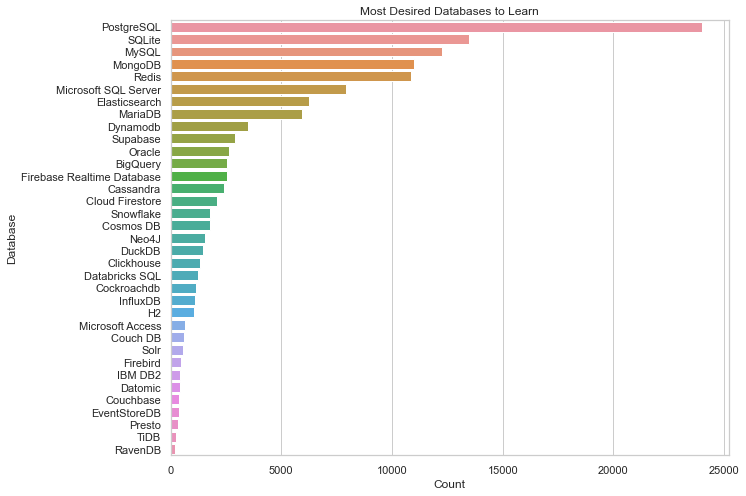

In [173]:
plt.figure(figsize=(10, 8))
sns.countplot(y=all_dbs, order=all_dbs.value_counts().index)
plt.title("Most Desired Databases to Learn")
plt.xlabel("Count")
plt.ylabel("Database")
plt.show()

### Histogram of Preferred Work Locations (RemoteWork)

In [174]:
work_type_df = pd.read_sql_query("SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL", conn2)
work_type_df

,RemoteWork
0,Remote
1,Remote
2,Remote
3,Remote
4,In-person
...,...
54801,"Hybrid (some remote, some in-person)"
54802,Remote
54803,Remote
54804,In-person


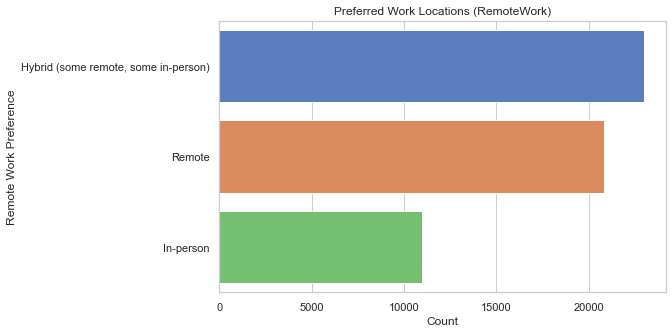

In [177]:
plt.figure(figsize=(8, 5))
sns.countplot(data=work_type_df, y='RemoteWork', order=work_type_df['RemoteWork'].value_counts().index, palette = 'muted')
plt.title("Preferred Work Locations (RemoteWork)")
plt.xlabel("Count")
plt.ylabel("Remote Work Preference")
plt.show()


### Histogram of Median CompTotal for Ages 45 to *54*
*revised original assignment to be 45-54 instead of 45-60 since the provided dataset now has age groups and not numerical age values

In [261]:
age_comp_df2 = pd.read_sql_query("SELECT Age, CompTotal FROM main WHERE CompTotal IS NOT NULL AND CompTotal < 1000000 AND Age = '45-54 years old'", conn2)
print(age_comp_df2.head(10))

# calculate median for plotting
median_45_54 = age_comp_df2['CompTotal'].median()
print(median_45_54)

print(age_comp_df2.describe())

               Age  CompTotal
0  45-54 years old    95000.0
1  45-54 years old   195000.0
2  45-54 years old   145000.0
3  45-54 years old   115000.0
4  45-54 years old   300000.0
5  45-54 years old   350000.0
6  45-54 years old   100000.0
7  45-54 years old   140000.0
8  45-54 years old    50000.0
9  45-54 years old   175000.0
120000.0
           CompTotal
count    3210.000000
mean   169731.593458
std    170465.861844
min         0.000000
25%     72000.000000
50%    120000.000000
75%    190000.000000
max    984000.000000


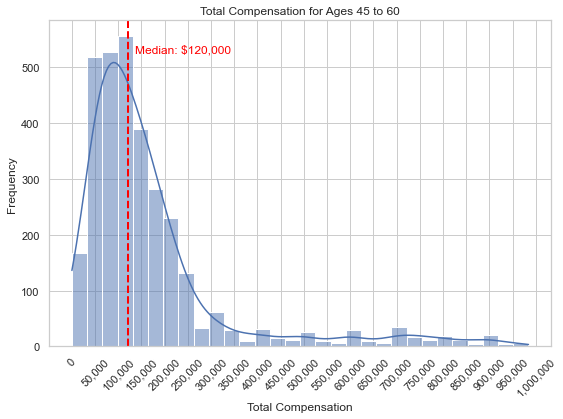

In [195]:
plt.figure(figsize=(9, 6))
sns.histplot(age_comp_df2['CompTotal'], bins=30, kde=True)

# add median line
plt.axvline(median_45_54, color='red', linestyle='--', linewidth=2)
plt.text(median_45_54 + 17000, plt.ylim()[1]*0.9, f"Median: ${int(median_45_54):,}", color='red')

# customize x-ticks
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(50000))  # custom ticks every 50k
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x):,}")) 
plt.xticks(rotation=45)

plt.title("Total Compensation for Ages 45 to 60")
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.show()

### Histogram of Job Satisfaction (JobSat) by YearsCodePro

In [202]:
prof_code_sat_df = pd.read_sql_query("SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL", conn2)

# update non-numerical data for less than 1 year and more than 50 years
prof_code_sat_df['YearsCodePro'] = prof_code_sat_df['YearsCodePro'].replace({'Less than 1 year': 0.5, 'More than 50 years': 51}).astype(float)

# verify data content
prof_code_sat_df['YearsCodePro'].unique()
prof_code_sat_df['JobSat'].unique()

array([ 8.,  5., 10.,  6.,  9.,  4.,  7.,  3.,  2.,  1.,  0.])

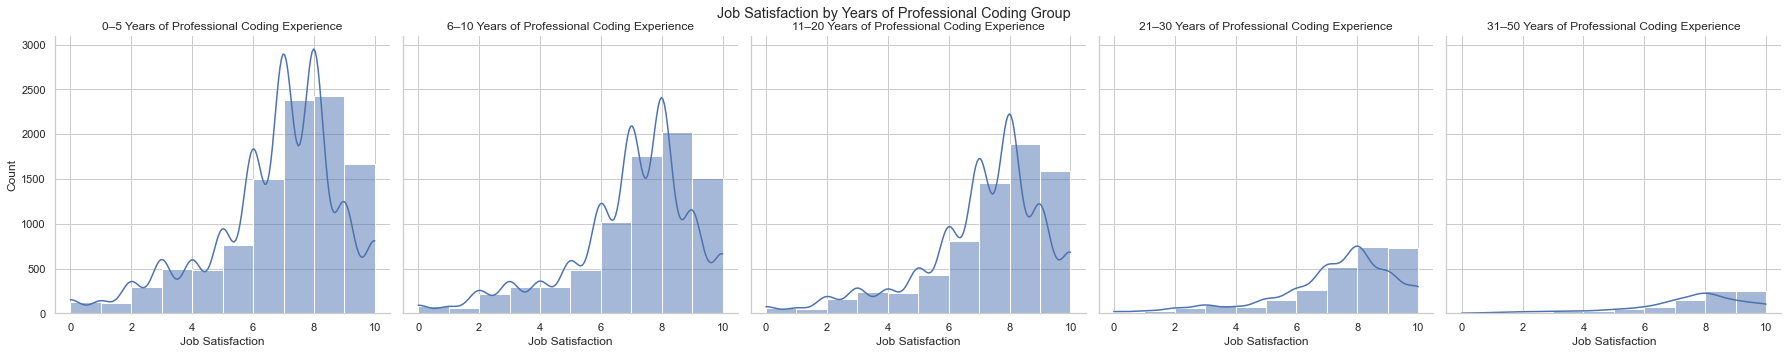

In [235]:
# bin YearsCodePro for grouping
prof_code_sat_df['ExperienceGroup'] = pd.cut(prof_code_sat_df['YearsCodePro'], bins=[0, 5, 10, 20, 30, 50], 
                               labels=["0–5", "6–10", "11–20", "21–30", "31–50"])

# plot facet histograms by coding experience group
g = sns.displot(data=prof_code_sat_df, x="JobSat", col="ExperienceGroup", col_wrap =5, bins=10, kde=True, palette="muted")

g.set_titles("{col_name} Years of Professional Coding Experience")
g.set_axis_labels("Job Satisfaction", "Count")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Job Satisfaction by Years of Professional Coding Group")
plt.show()


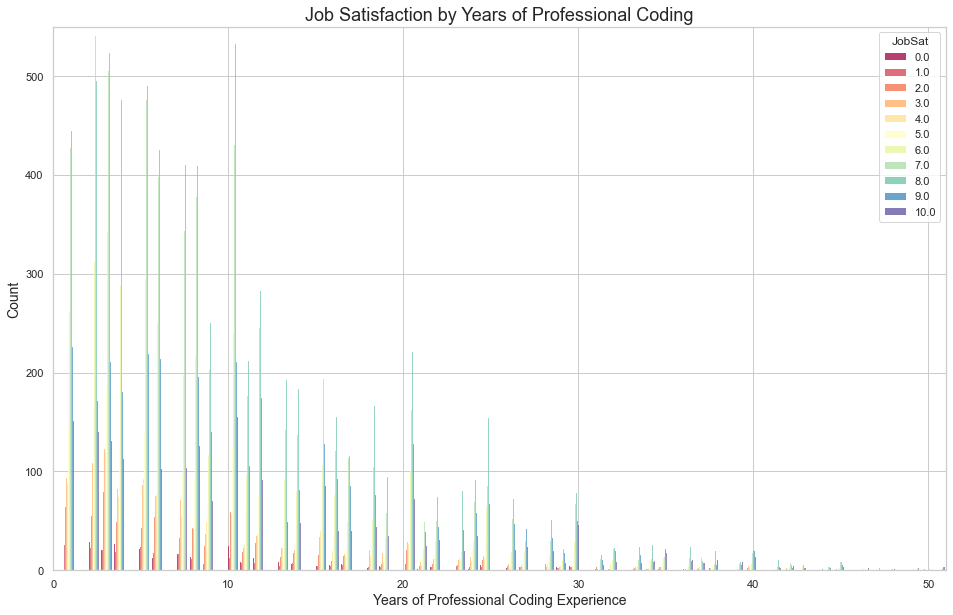

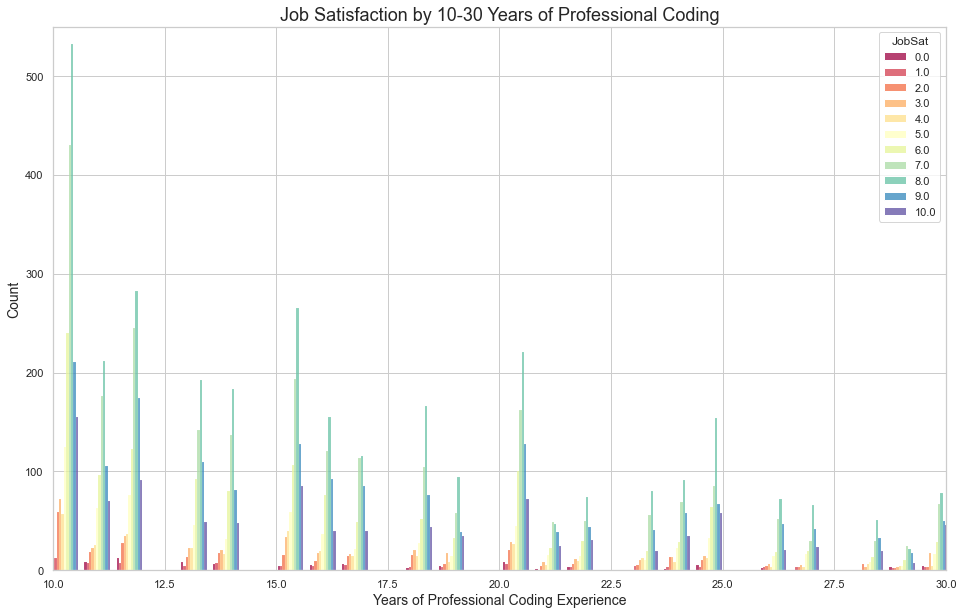

In [233]:
# plot 1 (all data)
plt.figure(figsize=(16, 10))
sns.histplot(data=prof_code_sat_df, x='YearsCodePro', hue='JobSat', palette='Spectral', multiple='dodge', shrink=0.8)
plt.title("Job Satisfaction by Years of Professional Coding", fontsize=18)
plt.xlabel("Years of Professional Coding Experience", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0,550)
plt.xlim(0,51)
plt.show()

# plot 2 (limited data for better visibility)
plt.figure(figsize=(16, 10))
sns.histplot(data=prof_code_sat_df, x='YearsCodePro', hue='JobSat', palette='Spectral', multiple='dodge', shrink=0.8)
plt.title("Job Satisfaction by 10-30 Years of Professional Coding", fontsize=18)
plt.xlabel("Years of Professional Coding Experience", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.ylim(0,550)
plt.xlim(10,30)
plt.show()

## Close database connection

In [262]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
